In [72]:
import pandas as pd
import numpy as np

In [73]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie,axis,show
import seaborn as sb
import plotly.express as pe
import plotly.graph_objects as pg
from plotly.subplots import make_subplots
from itertools import combinations
%matplotlib inline

In [159]:
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Data Pre-processing

In [106]:
data = pd.read_csv('IRIS.csv')

In [107]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [108]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [110]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [111]:
data.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [112]:
data.nunique().sum()

126

In [113]:
data.nunique().describe()

count     5.000000
mean     25.200000
std      15.172343
min       3.000000
25%      22.000000
50%      23.000000
75%      35.000000
max      43.000000
dtype: float64

In [114]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [115]:
data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Data Visualization

([<matplotlib.patches.Wedge at 0x285088738d0>,
 [Text(0.42712925055244266, 1.0136866396093562, 'Iris-setosa'),
  Text(-1.0872764124153218, -0.1668232687764721, 'Iris-versicolor'),
  Text(0.5759219767572978, -0.9371840143152073, 'Iris-virginica')])

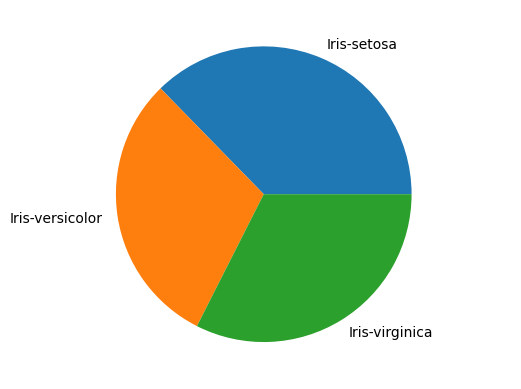

In [116]:
pi = data.groupby(data["species"])["sepal_width"].sum()
axis('equal')
pie(pi, labels=pi.index)

([<matplotlib.patches.Wedge at 0x285088a9e10>,
 [Text(0.6862349960252501, 0.8596985112411358, 'Iris-setosa'),
  Text(-1.0560862635105888, 0.307704085160148, 'Iris-versicolor'),
  Text(0.41835509902501383, -1.017339181944631, 'Iris-virginica')])

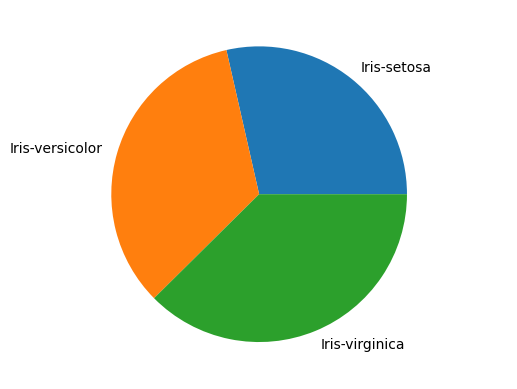

In [117]:
pi2 = data.groupby(data["species"])["sepal_length"].sum()
axis('equal')
pie(pi2, labels=pi2.index)

([<matplotlib.patches.Wedge at 0x285088ca450>,
 [Text(1.00975880315702, 0.4363337706926918, 'Iris-setosa'),
  Text(-0.46040024765725857, 0.9990153211823807, 'Iris-versicolor'),
  Text(0.026353401098848293, -1.0996842720756368, 'Iris-virginica')])

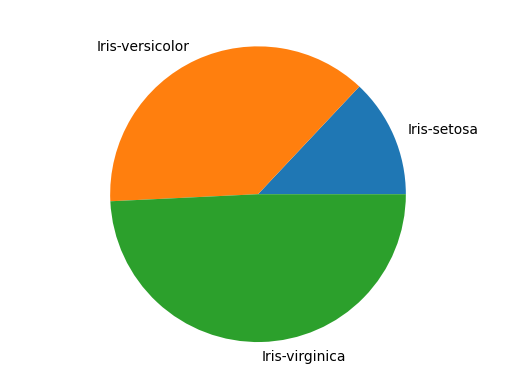

In [118]:
pi3 = data.groupby(data["species"])["petal_length"].sum()
axis('equal')
pie(pi3, labels=pi3.index)

([<matplotlib.patches.Wedge at 0x2850631f050>,
 [Text(1.075102397383806, 0.2327119144770912, 'Iris-setosa'),
  Text(-0.015375512631074296, 1.0998925373014092, 'Iris-versicolor'),
  Text(-0.21766162914510706, -1.0782501635510648, 'Iris-virginica')])

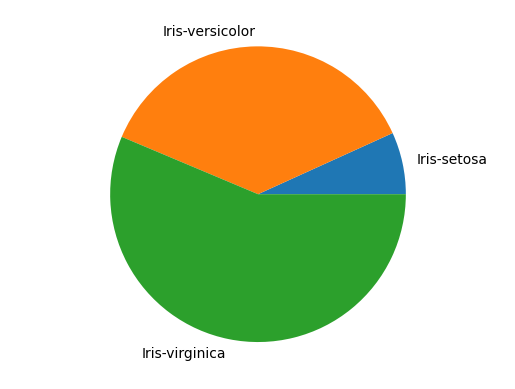

In [119]:
pi4 = data.groupby(data["species"])["petal_width"].sum()
axis('equal')
pie(pi4, labels=pi4.index)

In [120]:
bg=pd.DataFrame(data)

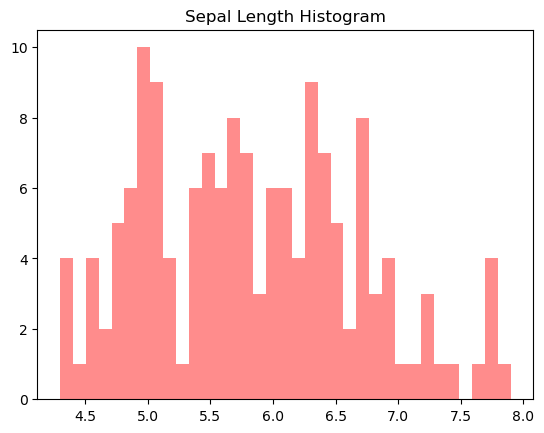

In [121]:
plt.hist(data['sepal_length'], bins=35, alpha=0.45, color='red')
plt.title("Sepal Length Histogram")
plt.show()

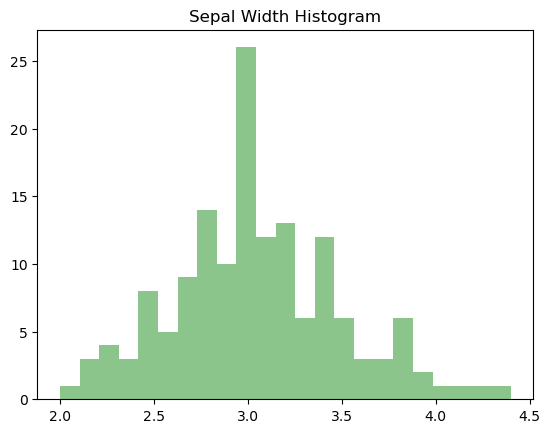

In [122]:
plt.hist(data['sepal_width'], bins=23, alpha=0.45, color='green')
plt.title("Sepal Width Histogram")
plt.show()

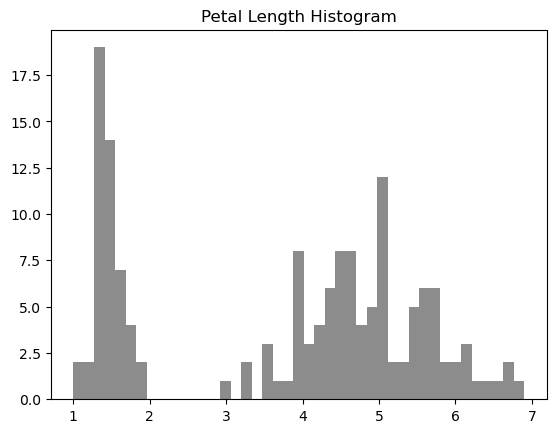

In [187]:
plt.hist(data['petal_length'], bins=43, alpha=0.45, color='black')
plt.title("Petal Length Histogram")
plt.show()

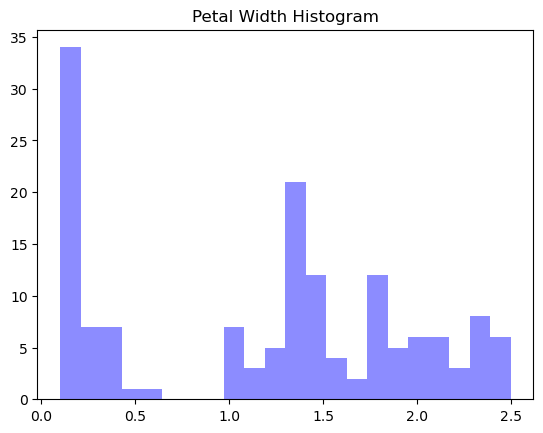

In [188]:
plt.hist(data['petal_width'], bins=22, alpha=0.45, color='blue')
plt.title("Petal Width Histogram")
plt.show()

In [125]:
hist=pe.histogram(data, x="species", color="sepal_length")
hist.show()

In [126]:
hist=pe.histogram(data, x="species", color="sepal_width")
hist.show()

In [127]:
hist=pe.histogram(data, x="species", color="petal_length")
hist.show()

In [128]:
hist=pe.histogram(data, x="species", color="petal_width")
hist.show()

<Axes: >

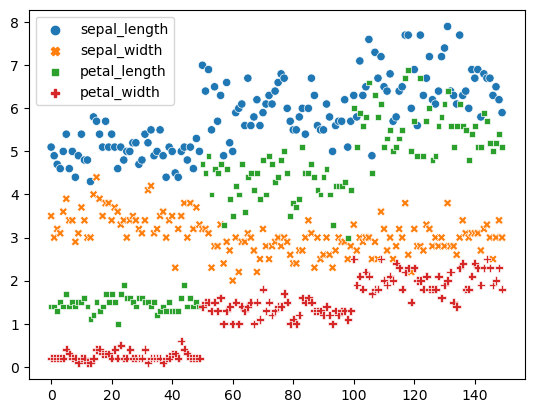

In [129]:
scattering = sb.load_dataset("iris")
sb.scatterplot(data=scattering)

In [130]:
species_encoding = data.groupby('species').agg({'sepal_length': 'mean'}).to_dict()
data['species_encoded'] = round(data['species'].map(species_encoding['sepal_length']), 1)
data.species_encoded.unique()

array([5. , 5.9, 6.6])

In [132]:
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,0,5.0
1,4.9,3.0,1.4,0.2,0,5.0
2,4.7,3.2,1.3,0.2,0,5.0
3,4.6,3.1,1.5,0.2,0,5.0
4,5.0,3.6,1.4,0.2,0,5.0


<Axes: >

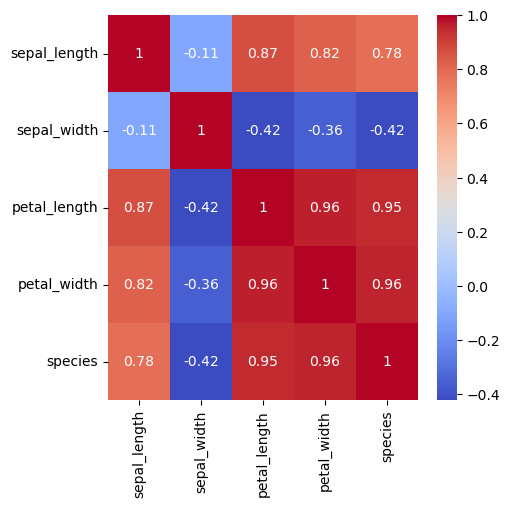

In [136]:
corr=data.corr()
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

# Module Implementation

In [176]:
X = data.drop(columns=['species'])
Y = data['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 )

In [177]:
model = LogisticRegression()

In [180]:
model.fit(x_train, y_train)

C:\Users\Ozwin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [181]:
print("Logistic Regression Accuracy: ", model.score(x_test, y_test)*100,"%")

Logistic Regression Accuracy:  97.77777777777777 %


In [182]:
model = KNeighborsClassifier()

In [183]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [184]:
print("KNeighbors Accuracy: ", model.score(x_train, y_train)*100,"%")

KNeighbors Accuracy:  97.14285714285714 %


In [185]:
model = DecisionTreeClassifier()

In [186]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [175]:
print("Decision Tree Accuracy: ", model.score(x_train, y_train)*100,"%")

Decision Tree Accuracy:  100.0 %
